# Biodiversity In National Parks

To start this project it's important to analyze the project files given.
Before loadind them into the work space first it is necessary to open the original files.

On the species_info.csv file there are 4 columns:
    + category
    + scientific_name
    + common_names
    + conservation_status
    
The names of the columns do not need to be changed because they are easily accessible, but on the last column there are missing values which will have to be addressed later.
In total the file contains information on 5824 species.

The observations.csv file contains 3 columns:
    + scientific_name
    + park_name
    + observations
    
This file also as column names that are easily accessible, which means that they don't have to be changed. And in the first look all the columns appear to have all of the values.
In total the file contains observations on 23296 species of the national parks.

### Load the libraries

First let's load the necessary libraries.

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt

### Load and analyze the files

In [2]:
#species_info.csv
spi = pd.read_csv("species_info.csv")
print(spi.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [3]:
#observations.csv
obs = pd.read_csv("observations.csv")
print(obs.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


## Explore and explain the data

Next we will draw some conclusions of the data on both files

### Conservation status

First let's see the distribution of the status of the species.
As referred previously the conservation_status column as missing values, this will have to be addressed first. To address this issue we will first see what are the status attributed to the species.

#### Status attibuted

In [4]:
print(spi.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


###### There are 4 status attibuted to the species, and none of them are "Non Dangered", so we will attribute this status to the species with no status attributed

After filling the missing values a histogram to see the distribution of the conservation status.

Text(0.5, 1.0, 'Distribution of Conservation Status')

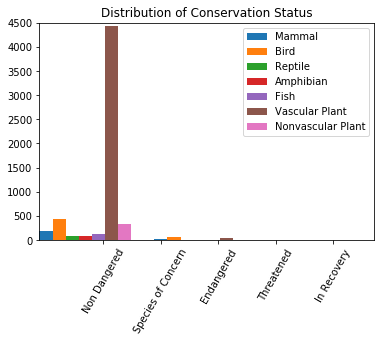

In [39]:
spi = spi.fillna(value = {"conservation_status": "Non Dangered"})
#print(spi.head())
cons_sta = spi.conservation_status.unique()
catg = spi.category.unique()

for i in range(len(catg)):
    cont = []
    for j in range(len(cons_sta)):
        cont.append(len(spi[(spi.conservation_status == cons_sta[j]) & (spi.category == catg[i])]))
    n = i #dataset
    t = len(catg) #number of datasets
    d = len(cons_sta) # number of sets of bars
    w = 0.8 #width of the bars
    x_val = [t*element + w*n for element in range(d)]
    plt.bar(x_val, cont, label = catg[i])

plt.legend()
middle_x = [(len(catg) / 2) * (elm + 1) for elm in range(len(cons_sta))]
plt.xticks(middle_x, cons_sta, rotation = 60)
plt.axis([-0.4, 20, 0, 4500])
plt.title("Distribution of Conservation Status")